# [Clustering] Submission Akhir BMLP - Ridho Bintang Aulia

**Nama:** Ridho Bintang Aulia

**Dataset:** Bank Transaction Dataset for Fraud Detection (Modified)

---

## Penting

Notebook ini berisi proses **clustering** pada dataset transaksi bank. Proyek ini mencakup:
1. Exploratory Data Analysis (EDA)
2. Pembersihan dan Pra Pemrosesan Data
3. Membangun Model Clustering (K-Means)
4. Interpretasi Hasil Clustering
5. Mengekspor Data Hasil Clustering

Setiap tahapan dilengkapi dengan penjelasan metode, alasan penggunaan, dan interpretasi hasil.

## INFORMASI DATASET

Dataset yang digunakan adalah **Bank Transaction Dataset for Fraud Detection** (versi modifikasi dari Google Drive).

Dataset ini berisi informasi transaksi perbankan dengan 16 kolom, mencakup detail transaksi, informasi pelanggan, dan metadata perangkat.

| Kolom | Deskripsi |
|---|---|
| TransactionID | ID unik transaksi |
| AccountID | ID akun pelanggan |
| TransactionAmount | Jumlah transaksi |
| TransactionDate | Tanggal dan waktu transaksi |
| TransactionType | Jenis transaksi (Debit/Credit) |
| Location | Lokasi transaksi |
| DeviceID | ID perangkat |
| IP Address | Alamat IP |
| MerchantID | ID merchant |
| Channel | Kanal transaksi (ATM/Online/Branch) |
| CustomerAge | Usia pelanggan |
| CustomerOccupation | Pekerjaan pelanggan |
| TransactionDuration | Durasi transaksi (detik) |
| LoginAttempts | Jumlah percobaan login |
| AccountBalance | Saldo akun |
| PreviousTransactionDate | Tanggal transaksi sebelumnya |

## 1. Import Library

Pada tahap ini, kita mengimpor pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib
import warnings
warnings.filterwarnings('ignore')

print('Semua library berhasil diimpor!')

Semua library berhasil diimpor!


## 2. Memuat Dataset

Memuat dataset dari file CSV dan melakukan eksplorasi awal.

### Load Data

In [2]:
# Load data
df = pd.read_csv('bank_transactions_data_edited.csv')
print(f'Dataset berhasil dimuat dengan {df.shape[0]} baris dan {df.shape[1]} kolom.')

Dataset berhasil dimuat dengan 2537 baris dan 16 kolom.


### Output yang diharapkan:
Tampilkan 5 baris pertama dataset menggunakan `head()`.

**Metode:** `head()` digunakan untuk menampilkan 5 baris pertama dataset.

**Alasan:** Membantu memahami struktur dan isi awal dataset sebelum melakukan analisis lebih lanjut.

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


### Output yang diharapkan:
Menampilkan informasi dataset menggunakan `info()`.

**Metode:** `info()` memberikan ringkasan tipe data, jumlah non-null, dan penggunaan memori.

**Alasan:** Untuk mengetahui tipe data setiap kolom dan mendeteksi adanya missing values.

In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

### Output yang diharapkan:
Menampilkan statistik deskriptif dataset dengan `describe()`.

**Metode:** `describe()` menampilkan statistik deskriptif seperti mean, std, min, max, dan kuartil.

**Alasan:** Untuk mendapatkan gambaran distribusi data numerik secara cepat.

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


### Penilaian (Opsional)

#### Skilled - Kriteria 1: Matriks Korelasi dan Histogram

#### Menampilkan korelasi antar fitur

**Metode:** Matriks korelasi Pearson divisualisasikan menggunakan heatmap.

**Alasan:** Untuk mengidentifikasi hubungan linear antar fitur numerik. Fitur yang berkorelasi tinggi dapat memberikan informasi redundan dan perlu diperhatikan dalam proses clustering.

**Hasil yang didapat:** Matriks korelasi menunjukkan seberapa kuat hubungan antar fitur numerik.

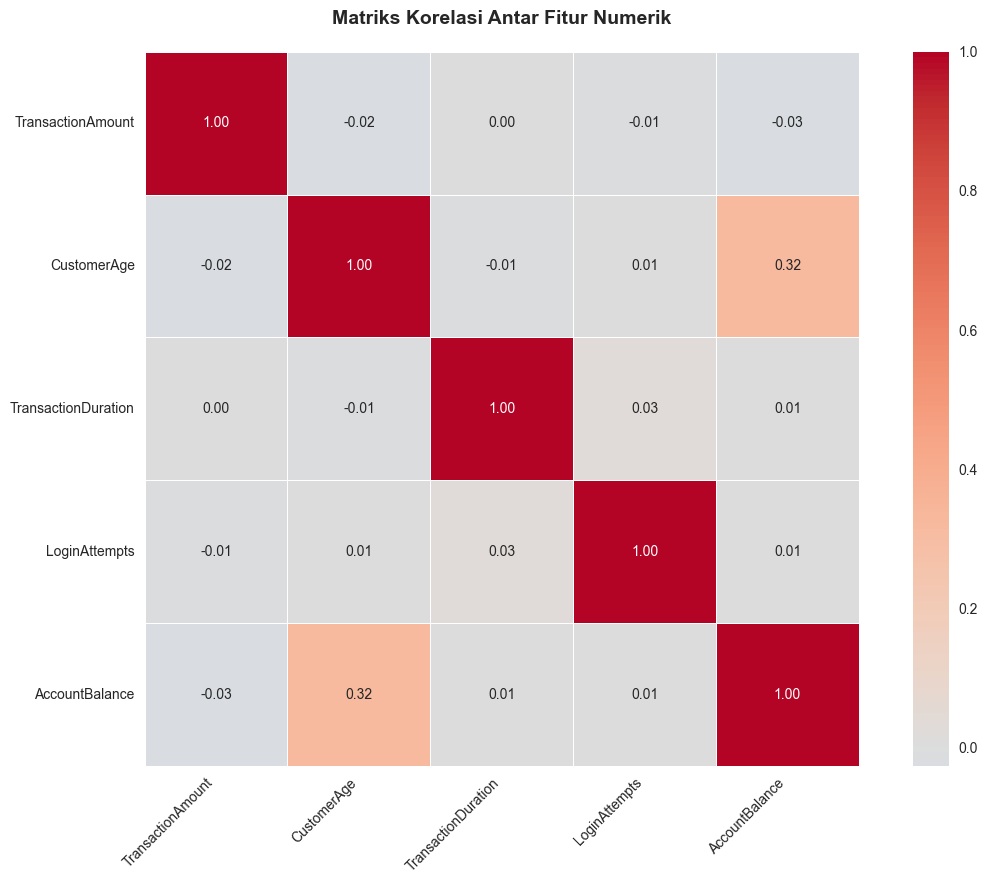


Interpretasi: Matriks korelasi menunjukkan hubungan antar fitur numerik.
Nilai mendekati 1 atau -1 menunjukkan korelasi kuat, sedangkan mendekati 0 menunjukkan korelasi lemah.


In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5, square=True,
            annot_kws={'size': 10})
plt.title('Matriks Korelasi Antar Fitur Numerik', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

print('\nInterpretasi: Matriks korelasi menunjukkan hubungan antar fitur numerik.')
print('Nilai mendekati 1 atau -1 menunjukkan korelasi kuat, sedangkan mendekati 0 menunjukkan korelasi lemah.')

#### Menampilkan histogram untuk semua kolom

**Metode:** Histogram untuk kolom numerik dan bar chart untuk kolom kategorikal.

**Alasan:** Histogram membantu memahami distribusi data pada setiap fitur. Untuk fitur kategorikal, bar chart menunjukkan frekuensi setiap kategori.

**Hasil yang didapat:** Visualisasi distribusi untuk semua kolom dalam dataset.

=== Histogram Fitur Numerik ===


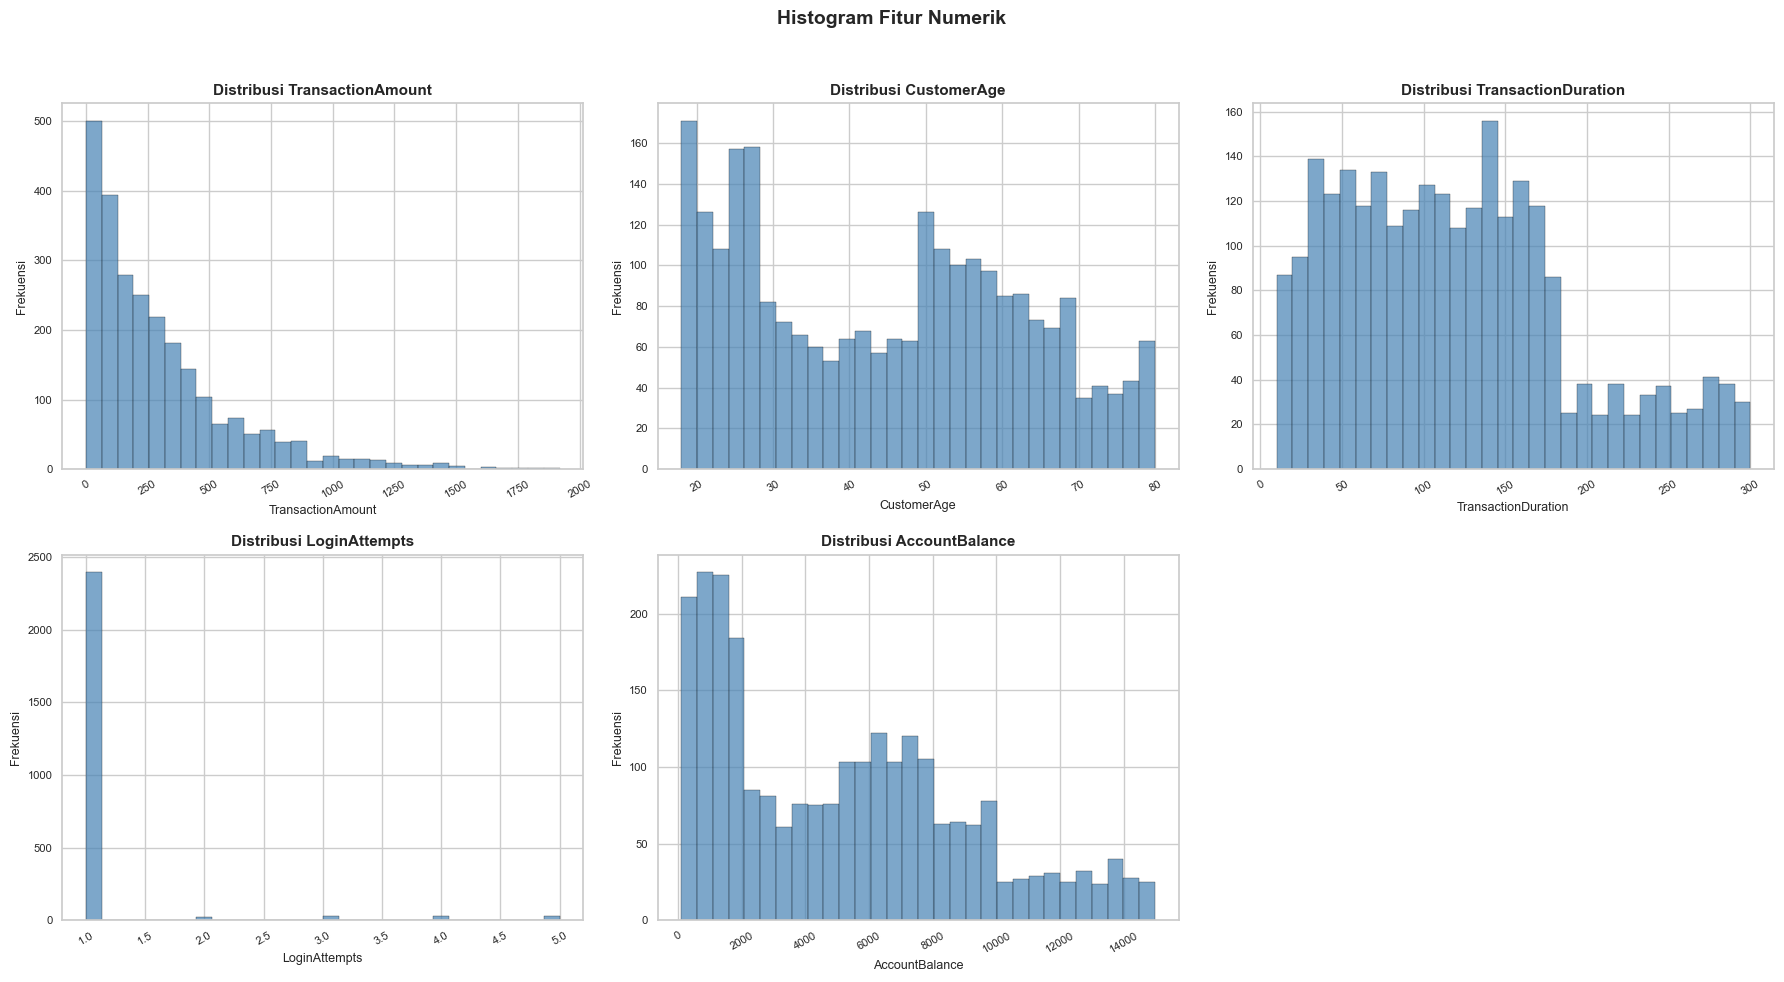

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print('=== Histogram Fitur Numerik ===')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    axes[i].hist(df[col].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribusi {col}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=9)
    axes[i].set_ylabel('Frekuensi', fontsize=9)
    axes[i].tick_params(axis='x', rotation=30, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    # Format x-axis for large numbers
    axes[i].ticklabel_format(style='plain', axis='x')

# Hapus axes kosong jika ada
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Histogram Fitur Numerik', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


=== Bar Chart Fitur Kategorikal ===


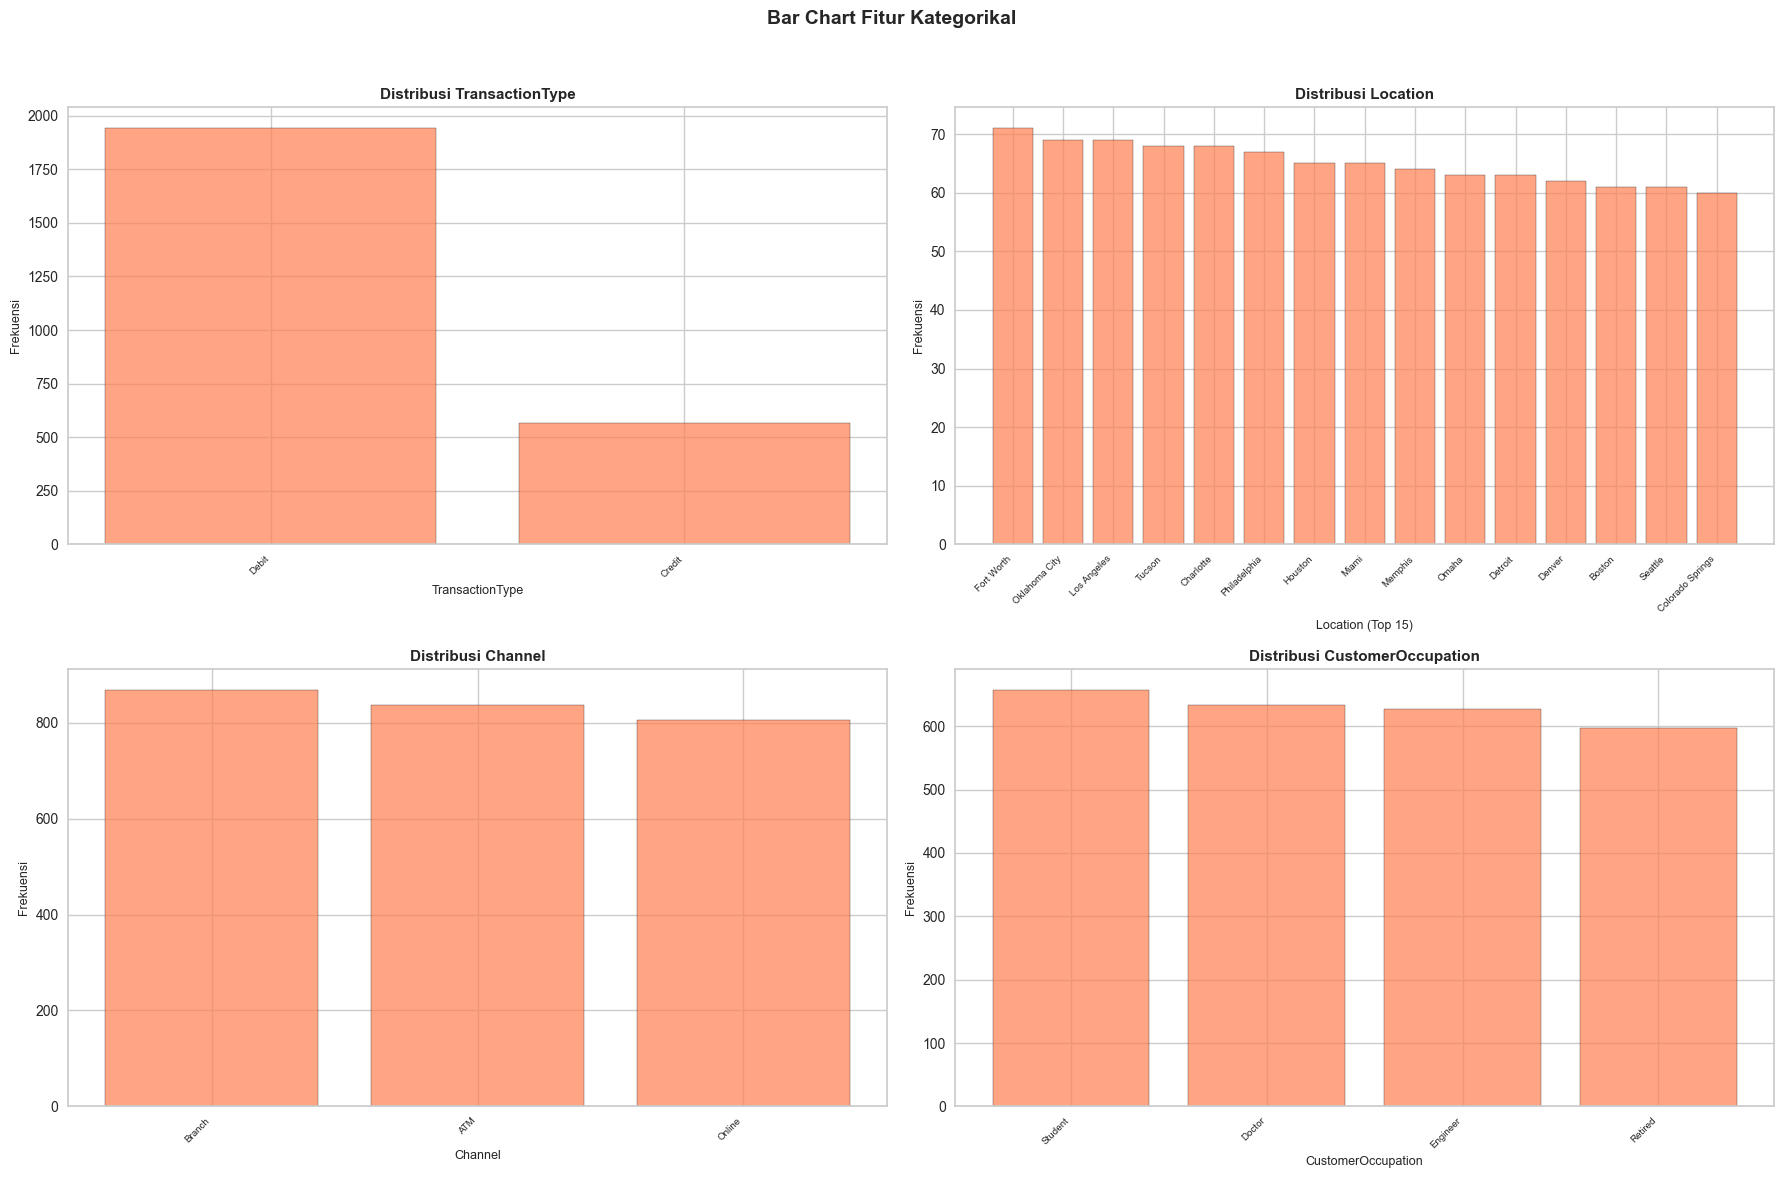

In [8]:
# Histogram untuk fitur kategorikal
print('\n=== Bar Chart Fitur Kategorikal ===')
# Filter hanya kategorikal yang relevan (bukan ID/Date)
cat_to_plot = [c for c in categorical_features if c not in 
               ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 
                'TransactionDate', 'PreviousTransactionDate']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(cat_to_plot):
    value_counts = df[col].value_counts()
    # Untuk kolom dengan banyak kategori (seperti Location), tampilkan top 15
    if len(value_counts) > 15:
        value_counts = value_counts.head(15)
        axes[i].set_xlabel(f'{col} (Top 15)', fontsize=9)
    else:
        axes[i].set_xlabel(col, fontsize=9)
    
    bars = axes[i].bar(range(len(value_counts)), value_counts.values, 
                       color='coral', edgecolor='black', alpha=0.7)
    axes[i].set_xticks(range(len(value_counts)))
    axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=7)
    axes[i].set_title(f'Distribusi {col}', fontsize=11, fontweight='bold')
    axes[i].set_ylabel('Frekuensi', fontsize=9)

for j in range(len(cat_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Bar Chart Fitur Kategorikal', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Penilaian (Opsional)

#### Advanced - Kriteria 1: Visualisasi yang Lebih Informatif (Tanpa Label Overlap)

**Metode:** Menggunakan `tight_layout()`, rotasi label, dan pengaturan figsize yang tepat agar tidak ada label yang overlap.

**Alasan:** Visualisasi yang rapi dan informatif memudahkan interpretasi data dan menghindari kesalahan pembacaan.

**Hasil yang didapat:** Visualisasi yang bersih tanpa label overlap.

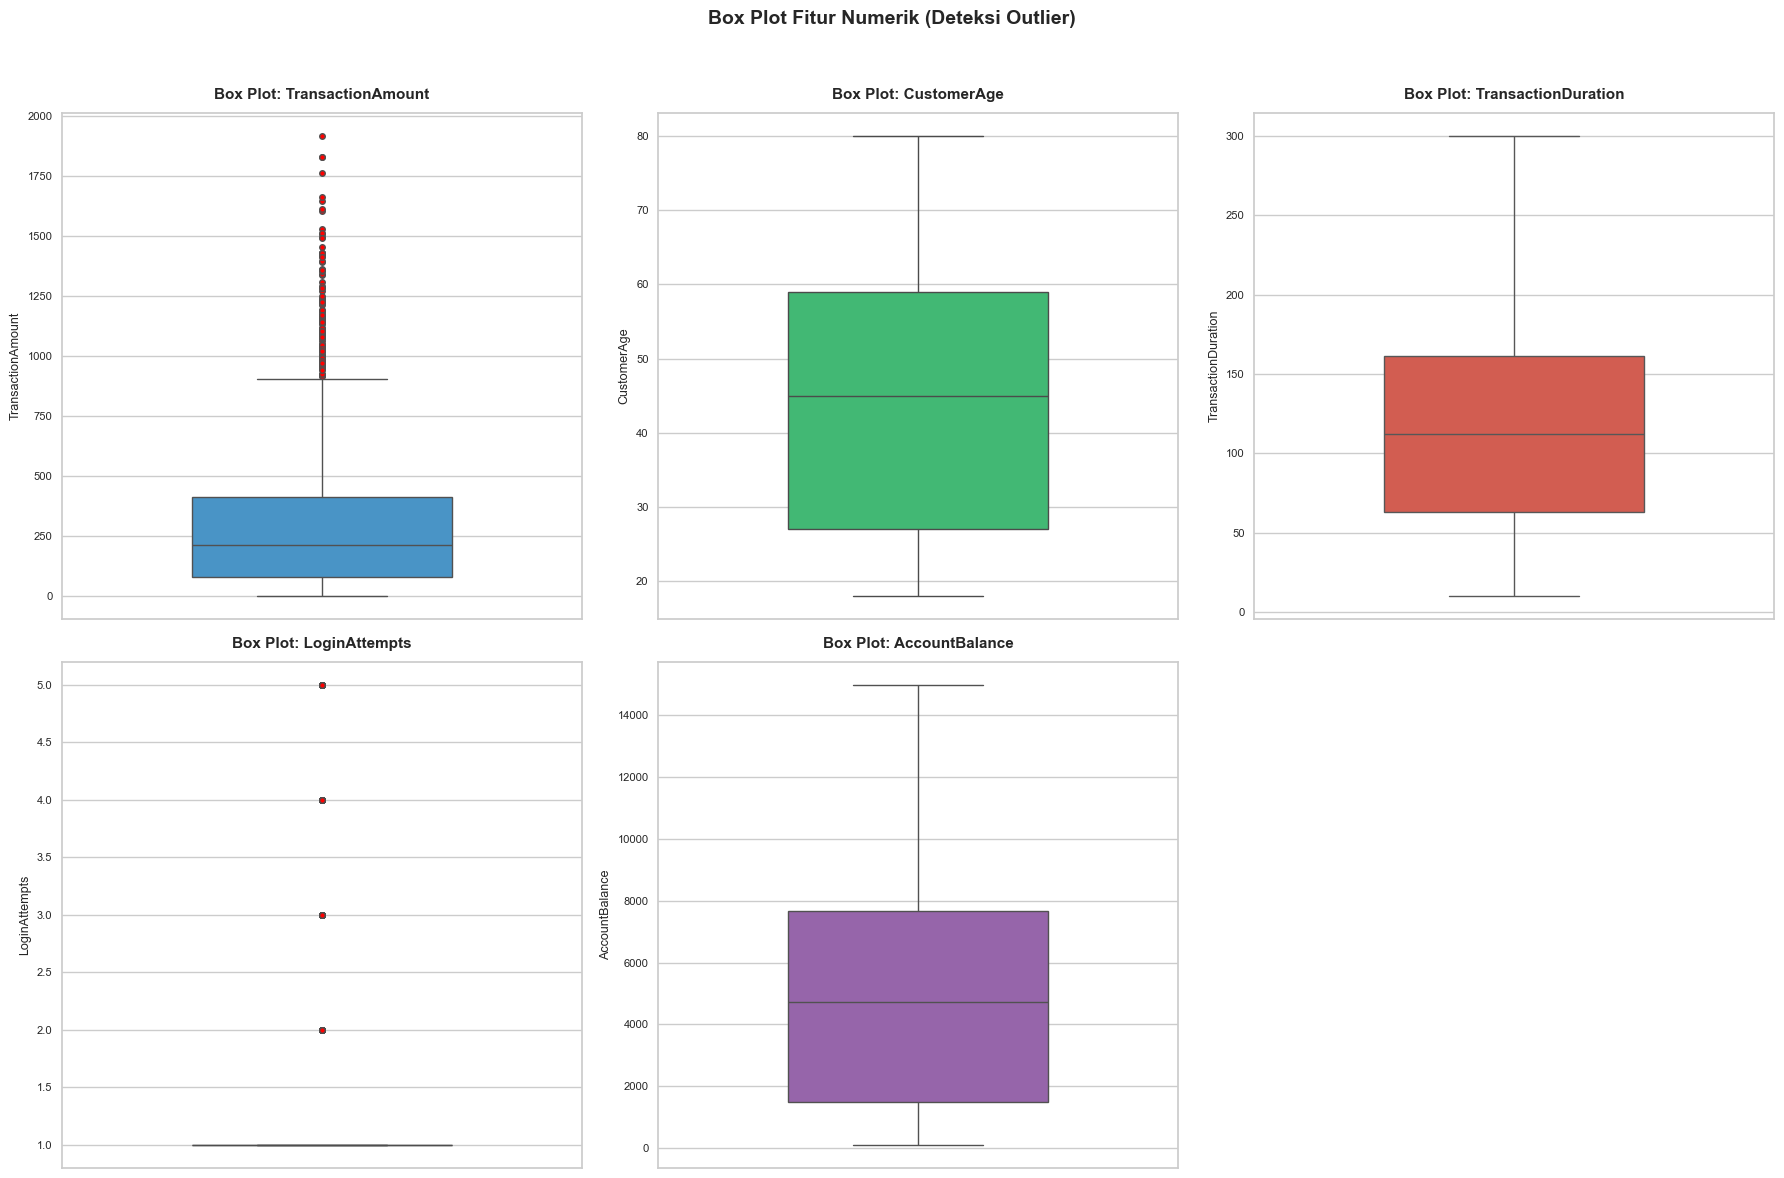

Interpretasi: Box plot di atas menunjukkan distribusi dan potensi outlier pada setiap fitur numerik.
Titik merah menunjukkan data yang berada di luar whisker (potensi outlier).


In [9]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']
for i, col in enumerate(numerical_features):
    sns.boxplot(y=df[col].dropna(), ax=axes[i], color=colors[i % len(colors)],
                flierprops=dict(marker='o', markerfacecolor='red', markersize=4),
                width=0.5)
    axes[i].set_title(f'Box Plot: {col}', fontsize=11, fontweight='bold', pad=10)
    axes[i].set_ylabel(col, fontsize=9)
    axes[i].tick_params(axis='both', labelsize=8)
    axes[i].ticklabel_format(style='plain', axis='y')

for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Box Plot Fitur Numerik (Deteksi Outlier)', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print('Interpretasi: Box plot di atas menunjukkan distribusi dan potensi outlier pada setiap fitur numerik.')
print('Titik merah menunjukkan data yang berada di luar whisker (potensi outlier).')

## 3. Pembersihan dan Pra Pemrosesan Data

Tahap ini mencakup penanganan missing values, duplikat, drop kolom, encoding, handling outlier, scaling, dan binning.

### Output yang diharapkan:
Mengecek missing values dan duplikat.

**Metode:** `isnull().sum()` dan `duplicated().sum()` untuk mengecek data yang hilang dan duplikat.

**Alasan:** Missing values dan duplikat dapat mempengaruhi kualitas hasil clustering sehingga perlu ditangani.

In [10]:
# Mengecek dataset menggunakan isnull().sum()
print('=== Missing Values ===')
print(df.isnull().sum())
print(f'\nTotal missing values: {df.isnull().sum().sum()}')

=== Missing Values ===


TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

Total missing values: 403


In [11]:
# Mengecek dataset menggunakan duplicated().sum()
print('=== Duplikat ===')
print(f'Jumlah data duplikat: {df.duplicated().sum()}')

=== Duplikat ===


Jumlah data duplikat: 21


### Output yang diharapkan:
Menangani data yang hilang dan duplikat.

**Metode:** `dropna()` untuk menghapus baris dengan missing values dan `drop_duplicates()` untuk menghapus data duplikat.

**Alasan:** Menghapus missing values dan duplikat memastikan dataset bersih untuk proses clustering yang akurat.

In [12]:
# Menangani data yang hilang.
df = df.dropna()
print(f'Jumlah baris setelah dropna: {df.shape[0]}')
print(f'Sisa missing values: {df.isnull().sum().sum()}')

Jumlah baris setelah dropna: 2156
Sisa missing values: 0

In [13]:
# Menghapus data duplikat.
df = df.drop_duplicates()
print(f'Jumlah baris setelah drop_duplicates: {df.shape[0]}')
print(f'Sisa duplikat: {df.duplicated().sum()}')

Jumlah baris setelah drop_duplicates: 2135
Sisa duplikat: 0


### Output yang diharapkan:
Melakukan drop kolom ID, Address, dan Date.

**Metode:** `drop()` untuk menghapus kolom yang tidak relevan untuk clustering.

**Alasan:** Kolom seperti TransactionID, AccountID, DeviceID, IP Address, MerchantID, TransactionDate, dan PreviousTransactionDate bersifat identifikasi dan tidak memberikan informasi bermakna untuk clustering.

**Hasil yang didapat:** Dataset hanya berisi fitur-fitur yang relevan untuk analisis clustering.

In [14]:
# Melakukan drop pada kolom yang memiliki keterangan Date, id, dan IP Address
columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 
                   'MerchantID', 'TransactionDate', 'PreviousTransactionDate']
df = df.drop(columns=columns_to_drop)
print(f'Kolom yang di-drop: {columns_to_drop}')
print(f'\nKolom yang tersisa: {df.columns.tolist()}')
print(f'Shape dataset: {df.shape}')

Kolom yang di-drop: ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate']

Kolom yang tersisa: ['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Shape dataset: (2135, 9)


### Output yang diharapkan:
Melakukan feature encoding untuk fitur kategorikal.

**Metode:** `LabelEncoder()` dari scikit-learn untuk mengubah fitur kategorikal menjadi numerik.

**Alasan:** Algoritma K-Means hanya menerima input numerik, sehingga fitur kategorikal harus di-encode terlebih dahulu.

**Hasil yang didapat:** Semua fitur kategorikal telah diubah menjadi representasi numerik.

In [15]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f'Kolom kategorikal yang akan di-encode: {categorical_cols}')

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f'  {col}: {list(le.classes_)} -> {list(range(len(le.classes_)))}')

print(f'\nDataset setelah encoding:')
df.head()

Kolom kategorikal yang akan di-encode: ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
  TransactionType: ['Credit', 'Debit'] -> [0, 1]


  Location: ['Albuquerque', 'Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte', 'Chicago', 'Colorado Springs', 'Columbus', 'Dallas', 'Denver', 'Detroit', 'El Paso', 'Fort Worth', 'Fresno', 'Houston', 'Indianapolis', 'Jacksonville', 'Kansas City', 'Las Vegas', 'Los Angeles', 'Louisville', 'Memphis', 'Mesa', 'Miami', 'Milwaukee', 'Nashville', 'New York', 'Oklahoma City', 'Omaha', 'Philadelphia', 'Phoenix', 'Portland', 'Raleigh', 'Sacramento', 'San Antonio', 'San Diego', 'San Francisco', 'San Jose', 'Seattle', 'Tucson', 'Virginia Beach', 'Washington'] -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
  Channel: ['ATM', 'Branch', 'Online'] -> [0, 1, 2]
  CustomerOccupation: ['Doctor', 'Engineer', 'Retired', 'Student'] -> [0, 1, 2, 3]



Dataset setelah encoding:

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68


In [16]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
print('Seluruh fitur yang ada setelah preprocessing awal:')
print(df.columns.tolist())
print(f'\nJumlah fitur: {len(df.columns)}')
print(f'Jumlah baris: {len(df)}')
df.dtypes

Seluruh fitur yang ada setelah preprocessing awal:
['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

Jumlah fitur: 9
Jumlah baris: 2135


TransactionAmount      float64
TransactionType          int32
Location                 int32
Channel                  int32
CustomerAge            float64
CustomerOccupation       int32
TransactionDuration    float64
LoginAttempts          float64
AccountBalance         float64
dtype: object

### Penilaian (Opsional)

#### Skilled - Kriteria 2: Handling Outlier dan Feature Scaling

#### Handling Outlier Data menggunakan metode drop

**Metode:** Metode IQR (Interquartile Range) digunakan untuk mendeteksi dan menghapus outlier.

**Alasan:** Outlier dapat mendistorsi hasil clustering karena K-Means sensitif terhadap data ekstrem. Menghapus outlier memastikan cluster yang terbentuk lebih representatif.

**Hasil yang didapat:** Dataset bebas dari outlier pada fitur numerik.

In [17]:
# Melakukan Handling Outlier Data menggunakan metode drop.
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(f'Jumlah baris sebelum handling outlier: {len(df)}')

for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if len(outliers) > 0:
        print(f'  {col}: {len(outliers)} outlier dihapus (range: {lower_bound:.2f} - {upper_bound:.2f})')
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f'\nJumlah baris setelah handling outlier: {len(df)}')
df = df.reset_index(drop=True)
print('Index telah di-reset.')

Jumlah baris sebelum handling outlier: 2135
  TransactionAmount: 93 outlier dihapus (range: -414.33 - 912.01)
  TransactionType: 466 outlier dihapus (range: 1.00 - 1.00)


  LoginAttempts: 75 outlier dihapus (range: 1.00 - 1.00)

Jumlah baris setelah handling outlier: 1501
Index telah di-reset.


#### Feature Scaling menggunakan StandardScaler

**Metode:** `StandardScaler()` untuk menormalisasi fitur numerik agar memiliki mean=0 dan std=1.

**Alasan:** K-Means menggunakan jarak Euclidean, sehingga fitur dengan skala lebih besar akan mendominasi perhitungan jarak. StandardScaler memastikan semua fitur memiliki kontribusi yang setara.

**Hasil yang didapat:** Semua fitur numerik telah dinormalisasi.

In [18]:
# Melakukan feature scaling menggunakan StandardScaler() untuk fitur numerik.
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(f'Fitur numerik yang akan di-scale: {numerical_features}')

# Simpan data sebelum scaling untuk inverse nanti
df_before_scaling = df.copy()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

print('\nStatistik setelah scaling:')
print(df[numerical_features].describe().loc[['mean', 'std']].round(4))
df.head()

Fitur numerik yang akan di-scale: ['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']



Statistik setelah scaling:


      TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
mean            -0.0000              0.0   -0.0000   0.0000       0.0000   
std              1.0003              0.0    1.0003   1.0003       1.0003   

      CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
mean             -0.0000              -0.0000            0.0          0.0000  
std               1.0003               1.0003            0.0          1.0003  


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-1.107930,0.0,1.200869,-1.088615,1.444427,-1.316889,-0.537894,0.0,0.014221
1,0.579431,0.0,-0.503358,-1.088615,1.331694,-1.316889,0.304662,0.0,2.253155
2,-0.585158,0.0,0.145871,1.361177,-1.430270,1.311635,-0.888959,0.0,-1.018894
3,-0.313941,0.0,0.957408,1.361177,-1.035703,1.311635,-1.324280,0.0,0.909321
4,-0.744226,0.0,0.551640,-1.088615,-1.486636,1.311635,0.739983,0.0,-1.107106


### Penilaian (Opsional)

#### Advanced - Kriteria 2: Binning Data

**Metode:** Binning (discretization) pada fitur numerik `TransactionAmount` dan `AccountBalance` untuk mengkategorikan nilai ke dalam rentang tertentu. Hasil binning kemudian di-encode dengan `LabelEncoder`.

**Alasan:** Binning membantu mengurangi noise dan membuat pola data lebih jelas untuk clustering. Dengan mengkategorikan nilai kontinu ke dalam bin, kita dapat menangkap pola perilaku pelanggan berdasarkan rentang nilai.

**Hasil yang didapat:** Fitur baru berdasarkan binning telah ditambahkan ke dataset.

In [19]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik.
# Binning dilakukan pada data SEBELUM scaling agar rentang bermakna.

# Binning TransactionAmount
ta_col = df_before_scaling['TransactionAmount']
bins_ta = [ta_col.min() - 1, ta_col.quantile(0.25), ta_col.quantile(0.50), 
           ta_col.quantile(0.75), ta_col.max() + 1]
labels_ta = ['Low', 'Medium', 'High', 'Very High']
df['TransactionAmount_Bin'] = pd.cut(df_before_scaling['TransactionAmount'], 
                                      bins=bins_ta, labels=labels_ta)

# Binning AccountBalance
ab_col = df_before_scaling['AccountBalance']
bins_ab = [ab_col.min() - 1, ab_col.quantile(0.25), ab_col.quantile(0.50), 
           ab_col.quantile(0.75), ab_col.max() + 1]
labels_ab = ['Low', 'Medium', 'High', 'Very High']
df['AccountBalance_Bin'] = pd.cut(df_before_scaling['AccountBalance'], 
                                   bins=bins_ab, labels=labels_ab)

print('Distribusi TransactionAmount_Bin:')
print(df['TransactionAmount_Bin'].value_counts())
print('\nDistribusi AccountBalance_Bin:')
print(df['AccountBalance_Bin'].value_counts())

# Encode hasil binning menggunakan LabelEncoder
le_ta_bin = LabelEncoder()
df['TransactionAmount_Bin'] = le_ta_bin.fit_transform(df['TransactionAmount_Bin'])
label_encoders['TransactionAmount_Bin'] = le_ta_bin

le_ab_bin = LabelEncoder()
df['AccountBalance_Bin'] = le_ab_bin.fit_transform(df['AccountBalance_Bin'])
label_encoders['AccountBalance_Bin'] = le_ab_bin

print('\nMapping TransactionAmount_Bin:', dict(zip(le_ta_bin.classes_, le_ta_bin.transform(le_ta_bin.classes_))))
print('Mapping AccountBalance_Bin:', dict(zip(le_ab_bin.classes_, le_ab_bin.transform(le_ab_bin.classes_))))

print('\nDataset setelah binning:')
df.head()

Distribusi TransactionAmount_Bin:
TransactionAmount_Bin
Low          376
Medium       375
High         375
Very High    375
Name: count, dtype: int64

Distribusi AccountBalance_Bin:
AccountBalance_Bin
Low          376
Medium       375
High         375
Very High    375
Name: count, dtype: int64

Mapping TransactionAmount_Bin: {'High': 0, 'Low': 1, 'Medium': 2, 'Very High': 3}
Mapping AccountBalance_Bin: {'High': 0, 'Low': 1, 'Medium': 2, 'Very High': 3}

Dataset setelah binning:


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_Bin,AccountBalance_Bin
0,-1.107930,0.0,1.200869,-1.088615,1.444427,-1.316889,-0.537894,0.0,0.014221,1,0
1,0.579431,0.0,-0.503358,-1.088615,1.331694,-1.316889,0.304662,0.0,2.253155,3,3
2,-0.585158,0.0,0.145871,1.361177,-1.430270,1.311635,-0.888959,0.0,-1.018894,2,1
3,-0.313941,0.0,0.957408,1.361177,-1.035703,1.311635,-1.324280,0.0,0.909321,2,3
4,-0.744226,0.0,0.551640,-1.088615,-1.486636,1.311635,0.739983,0.0,-1.107106,2,1


In [20]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
print('Statistik Deskriptif Dataset Setelah Preprocessing:')
df.describe()

Statistik Deskriptif Dataset Setelah Preprocessing:


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_Bin,AccountBalance_Bin
count,1.501000e+03,1501.0,1.501000e+03,1501.000000,1.501000e+03,1.501000e+03,1.501000e+03,1501.0,1.501000e+03,1501.000000,1501.000000
mean,-4.733796e-17,0.0,-8.520832e-17,0.000000,4.733796e-18,-5.798900e-17,-1.183449e-18,0.0,2.781105e-16,1.499667,1.499667
std,1.000333e+00,0.0,1.000333e+00,1.000333,1.000333e+00,1.000333e+00,1.000333e+00,0.0,1.000333e+00,1.118108,1.118108
min,-1.172368e+00,0.0,-1.720664e+00,-1.088615,-1.486636e+00,-1.316889e+00,-1.534919e+00,0.0,-1.283047e+00,0.000000,0.000000
25%,-8.072665e-01,0.0,-9.091267e-01,-1.088615,-9.793367e-01,-1.316889e+00,-7.906613e-01,0.0,-9.337901e-01,1.000000,1.000000
50%,-2.725665e-01,0.0,-1.643619e-02,0.136281,-2.110461e-02,-4.407141e-01,-1.025737e-01,0.0,-1.034678e-01,1.000000,1.000000
75%,5.277131e-01,0.0,8.762543e-01,1.361177,8.243943e-01,1.311635e+00,6.135991e-01,0.0,6.647565e-01,2.000000,2.000000
max,3.034644e+00,0.0,1.687791e+00,1.361177,2.008093e+00,1.311635e+00,2.537436e+00,0.0,2.568818e+00,3.000000,3.000000


## 4. Membangun Model Clustering

Pada tahap ini, kita membangun model K-Means Clustering. Pertama, kita menentukan jumlah cluster optimal menggunakan Elbow Method, kemudian membangun model dan mengevaluasinya.

### Output yang diharapkan (bisa berbeda):
Visualisasi Elbow Method untuk menentukan jumlah cluster terbaik.

**Metode:** `KElbowVisualizer()` dari yellowbrick untuk memvisualisasikan nilai distortion (inertia) pada berbagai jumlah cluster.

**Alasan:** Elbow Method membantu menentukan jumlah cluster optimal dengan mencari titik "siku" di mana penambahan cluster tidak lagi memberikan pengurangan distortion yang signifikan.

**Hasil yang didapat:** Jumlah cluster optimal teridentifikasi dari visualisasi Elbow.

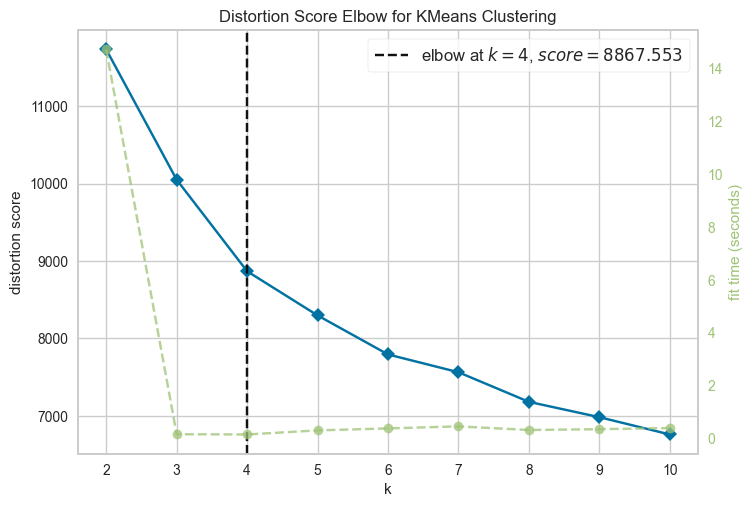


Jumlah cluster optimal berdasarkan Elbow Method: 4


In [21]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model_km = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model_km, k=(2, 11))
visualizer.fit(df)
visualizer.show()

optimal_k = visualizer.elbow_value_
print(f'\nJumlah cluster optimal berdasarkan Elbow Method: {optimal_k}')

### Output yang diharapkan (bisa berbeda):
Membangun model K-Means Clustering dengan jumlah cluster optimal.

**Metode:** `KMeans()` dari scikit-learn dengan jumlah cluster berdasarkan hasil Elbow Method.

**Alasan:** K-Means adalah algoritma clustering yang efisien dan mudah diinterpretasi. Cocok untuk data dengan fitur numerik yang telah di-standarisasi.

**Hasil yang didapat:** Setiap data point telah di-assign ke cluster tertentu.

In [22]:
# Menggunakan algoritma K-Means Clustering
model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = model.fit_predict(df)

print(f'Model K-Means berhasil dibangun dengan {optimal_k} cluster.')
print(f'\nDistribusi cluster:')
unique, counts = np.unique(clusters, return_counts=True)
for u, c in zip(unique, counts):
    print(f'  Cluster {u}: {c} data points ({c/len(clusters)*100:.1f}%)')

Model K-Means berhasil dibangun dengan 4 cluster.

Distribusi cluster:
  Cluster 0: 348 data points (23.2%)
  Cluster 1: 560 data points (37.3%)
  Cluster 2: 288 data points (19.2%)
  Cluster 3: 305 data points (20.3%)


In [23]:
# Menyimpan model menggunakan joblib
joblib.dump(model, 'model_clustering.h5')
print('Model clustering berhasil disimpan sebagai model_clustering.h5')

Model clustering berhasil disimpan sebagai model_clustering.h5


### Penilaian (Opsional)

#### Skilled - Kriteria 3: Silhouette Score dan Visualisasi Clustering

#### Silhouette Score

**Metode:** `silhouette_score()` untuk mengukur seberapa baik setiap data point cocok dengan clusternya dibandingkan dengan cluster terdekat lainnya.

**Alasan:** Silhouette Score memberikan metrik evaluasi objektif untuk kualitas clustering. Nilai mendekati 1 menunjukkan clustering yang baik.

**Hasil yang didapat:** Skor silhouette untuk menilai kualitas clustering.

In [24]:
# Menghitung dan menampilkan nilai Silhouette Score.
sil_score = silhouette_score(df, clusters)
print(f'Silhouette Score: {sil_score:.4f}')
print(f'\nInterpretasi:')
if sil_score > 0.5:
    print('  -> Clustering memiliki kualitas yang baik (skor > 0.5).')
elif sil_score > 0.25:
    print('  -> Clustering memiliki kualitas yang cukup (skor 0.25-0.5).')
else:
    print('  -> Clustering memiliki kualitas yang kurang baik (skor < 0.25).')

Silhouette Score: 0.1897

Interpretasi:
  -> Clustering memiliki kualitas yang kurang baik (skor < 0.25).


#### Visualisasi Hasil Clustering

**Metode:** Scatter plot 2D menggunakan dua fitur utama untuk memvisualisasikan pembagian cluster.

**Alasan:** Visualisasi membantu memahami bagaimana data terdistribusi ke dalam cluster-cluster yang terbentuk.

**Hasil yang didapat:** Plot scatter yang menunjukkan pemisahan antar cluster.

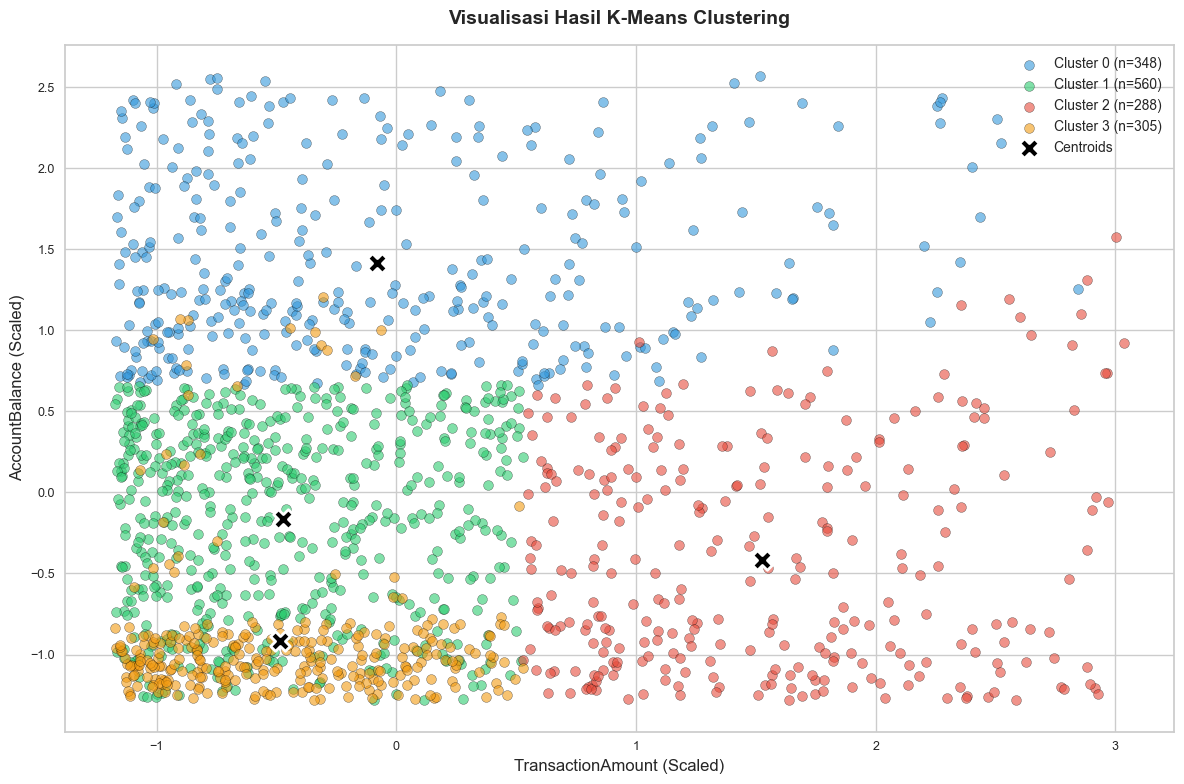

In [25]:
# Membuat visualisasi hasil clustering
fig, ax = plt.subplots(figsize=(12, 8))

cluster_names = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3'}
colors_map = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6', '#1abc9c']

for c_id in sorted(np.unique(clusters)):
    mask = clusters == c_id
    ax.scatter(df.loc[mask, 'TransactionAmount'], df.loc[mask, 'AccountBalance'],
               c=colors_map[c_id], alpha=0.6, s=50, edgecolors='black', linewidth=0.3,
               label=f'Cluster {c_id} (n={mask.sum()})')

# Plot centroids
centroids = model.cluster_centers_
ax.scatter(centroids[:, df.columns.get_loc('TransactionAmount')], 
           centroids[:, df.columns.get_loc('AccountBalance')],
           c='black', marker='X', s=200, edgecolors='white', linewidth=2, 
           label='Centroids', zorder=5)

ax.set_xlabel('TransactionAmount (Scaled)', fontsize=12)
ax.set_ylabel('AccountBalance (Scaled)', fontsize=12)
ax.set_title('Visualisasi Hasil K-Means Clustering', fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=10, loc='best', framealpha=0.9)
ax.tick_params(labelsize=9)
plt.tight_layout()
plt.show()

### Penilaian (Opsional)

#### Advanced - Kriteria 3: Model dengan PCA

**Metode:** `PCA()` (Principal Component Analysis) untuk mereduksi dimensi data menjadi 2 komponen utama, kemudian melakukan clustering kembali.

**Alasan:** PCA mengurangi dimensionalitas data sambil mempertahankan varian terbesar. Ini membantu menghilangkan noise dan multikolinearitas, serta memungkinkan visualisasi 2D yang lebih jelas.

**Hasil yang didapat:** Model clustering berbasis PCA sebagai pembanding model tanpa PCA.

Explained Variance Ratio: [0.23445046 0.18031226]
Total Explained Variance: 41.48%



Silhouette Score (PCA): 0.5064
Silhouette Score (Tanpa PCA): 0.1897


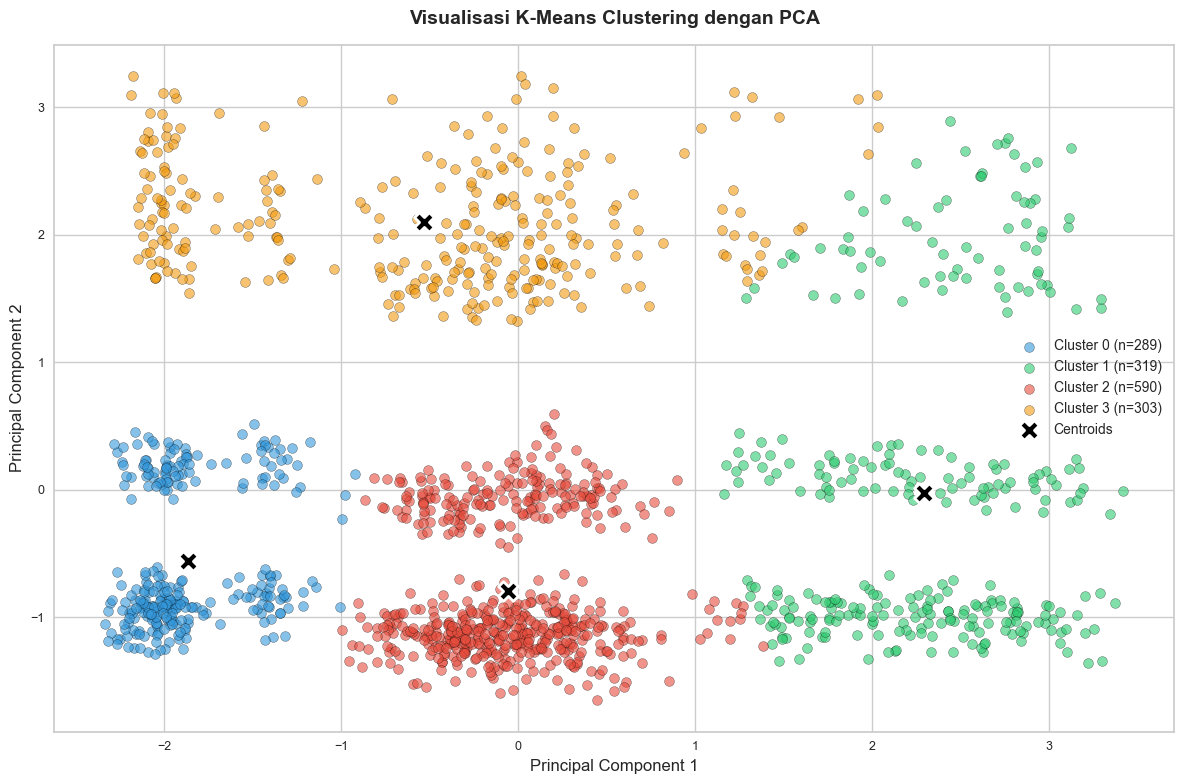

In [26]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df)

print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')
print(f'Total Explained Variance: {sum(pca.explained_variance_ratio_)*100:.2f}%')

# K-Means pada data PCA
model_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters_pca = model_pca.fit_predict(df_pca)

# Silhouette Score PCA
sil_score_pca = silhouette_score(df_pca, clusters_pca)
print(f'\nSilhouette Score (PCA): {sil_score_pca:.4f}')
print(f'Silhouette Score (Tanpa PCA): {sil_score:.4f}')

# Visualisasi PCA Clustering
fig, ax = plt.subplots(figsize=(12, 8))
colors_map = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6', '#1abc9c']

for c_id in sorted(np.unique(clusters_pca)):
    mask = clusters_pca == c_id
    ax.scatter(df_pca[mask, 0], df_pca[mask, 1],
               c=colors_map[c_id], alpha=0.6, s=50, edgecolors='black', linewidth=0.3,
               label=f'Cluster {c_id} (n={mask.sum()})')

centroids_pca = model_pca.cluster_centers_
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
           c='black', marker='X', s=200, edgecolors='white', linewidth=2, 
           label='Centroids', zorder=5)

ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_title('Visualisasi K-Means Clustering dengan PCA', fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=10, loc='best', framealpha=0.9)
ax.tick_params(labelsize=9)
plt.tight_layout()
plt.show()

In [27]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini
joblib.dump(model_pca, 'PCA_model_clustering.h5')
print('Model PCA clustering berhasil disimpan sebagai PCA_model_clustering.h5')

Model PCA clustering berhasil disimpan sebagai PCA_model_clustering.h5


## 5. Interpretasi Cluster

### a. Interpretasi Hasil Clustering

Pada bagian ini, kita menganalisis karakteristik tiap cluster berdasarkan statistik deskriptif dan menamai kolom cluster sebagai **Target**.

#### Analisis Deskriptif per Cluster

**Metode:** `groupby()` dan `agg()` untuk menghitung mean, min, dan max setiap fitur numerik per cluster.

**Alasan:** Statistik deskriptif membantu memahami karakteristik unik setiap cluster dan membedakan satu cluster dari yang lain.

**Hasil yang didapat:** Ringkasan statistik untuk setiap cluster.

In [28]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
df_clustered = df.copy()
df_clustered['Cluster'] = clusters

numerical_features_analysis = df.select_dtypes(include=[np.number]).columns.tolist()

print('=== Analisis Deskriptif per Cluster ===')
for cluster_id in sorted(df_clustered['Cluster'].unique()):
    print(f'\n--- Cluster {cluster_id} (n={len(df_clustered[df_clustered["Cluster"]==cluster_id])}) ---')
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id][numerical_features_analysis]
    stats = cluster_data.agg(['mean', 'min', 'max']).T
    print(stats.to_string())

=== Analisis Deskriptif per Cluster ===

--- Cluster 0 (n=348) ---
                           mean       min       max
TransactionAmount     -0.079339 -1.171483  2.844312
TransactionType        0.000000  0.000000  0.000000
Location               0.016678 -1.720664  1.687791
Channel               -0.103067 -1.088615  1.361177
CustomerAge            0.269799 -1.204803  1.838993
CustomerOccupation    -1.029866 -1.316889  1.311635
TransactionDuration    0.014206 -1.534919  2.537436
LoginAttempts          0.000000  0.000000  0.000000
AccountBalance         1.416452  0.665399  2.568818
TransactionAmount_Bin  1.528736  0.000000  3.000000
AccountBalance_Bin     3.000000  3.000000  3.000000

--- Cluster 1 (n=560) ---


                           mean       min       max
TransactionAmount     -0.471749 -1.172089  0.527713
TransactionType        0.000000  0.000000  0.000000
Location              -0.024552 -1.720664  1.687791
Channel               -0.003707 -1.088615  1.361177
CustomerAge            0.570845 -1.035703  2.008093
CustomerOccupation    -0.206024 -1.316889  0.435461
TransactionDuration   -0.045049 -1.520877  2.523393
LoginAttempts          0.000000  0.000000  0.000000
AccountBalance        -0.166499 -1.280313  0.664757
TransactionAmount_Bin  0.982143  0.000000  2.000000
AccountBalance_Bin     0.864286  0.000000  2.000000



--- Cluster 2 (n=288) ---
                           mean       min       max
TransactionAmount      1.525312  0.529064  3.034644
TransactionType        0.000000  0.000000  0.000000
Location               0.055700 -1.720664  1.687791
Channel                0.042712 -1.088615  1.361177
CustomerAge           -0.172786 -1.486636  2.008093
CustomerOccupation     0.310727 -1.316889  1.311635
TransactionDuration    0.064182 -1.534919  2.368925
LoginAttempts          0.000000  0.000000  0.000000
AccountBalance        -0.414486 -1.283047  1.576773
TransactionAmount_Bin  3.000000  3.000000  3.000000
AccountBalance_Bin     1.128472  0.000000  3.000000

--- Cluster 3 (n=305) ---
                           mean       min       max
TransactionAmount     -0.483609 -1.172368  0.527247
TransactionType        0.000000  0.000000  0.000000
Location              -0.026547 -1.720664  1.687791
Channel                0.084072 -1.088615  1.361177
CustomerAge           -1.192791 -1.486636 -0.866604
CustomerO

In [29]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_clustered = df_clustered.rename(columns={'Cluster': 'Target'})
print('Kolom cluster telah diubah menjadi Target.')
print(f'\nDistribusi Target:')
print(df_clustered['Target'].value_counts().sort_index())
df_clustered.head()

Kolom cluster telah diubah menjadi Target.

Distribusi Target:
Target
0    348
1    560
2    288
3    305
Name: count, dtype: int64


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_Bin,AccountBalance_Bin,Target
0,-1.107930,0.0,1.200869,-1.088615,1.444427,-1.316889,-0.537894,0.0,0.014221,1,0,1
1,0.579431,0.0,-0.503358,-1.088615,1.331694,-1.316889,0.304662,0.0,2.253155,3,3,0
2,-0.585158,0.0,0.145871,1.361177,-1.430270,1.311635,-0.888959,0.0,-1.018894,2,1,3
3,-0.313941,0.0,0.957408,1.361177,-1.035703,1.311635,-1.324280,0.0,0.909321,2,3,3
4,-0.744226,0.0,0.551640,-1.088615,-1.486636,1.311635,0.739983,0.0,-1.107106,2,1,3


### ⚠️ PERHATIAN: JAWAB DI BAWAH INI

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

**1. Cluster 0 (n=348) - "High-Balance Premium Customers"**
   - **Rata-rata TransactionAmount:** $234.85 (range: $0.45 - $862.34)
   - **Rata-rata CustomerAge:** 49.16 tahun (range: 23-77 tahun)
   - **Rata-rata AccountBalance:** $10,527.59 (range: $7,627.04 - $14,977.99)
   - **Rata-rata TransactionDuration:** 120.32 detik
   - **Mode Occupation:** Doctor
   - **Mode Channel:** ATM
   - **Analisis:** Cluster ini terdiri dari pelanggan dengan saldo akun yang sangat tinggi (rata-rata >$10,000). Mereka cenderung berusia paruh baya, bekerja sebagai Doctor, dan melakukan transaksi dengan nilai moderat. Kelompok ini merupakan nasabah premium dengan daya beli kuat dan stabilitas finansial tinggi.

**2. Cluster 1 (n=560) - "Mature Moderate Savers"**
   - **Rata-rata TransactionAmount:** $150.63 (range: $0.32 - $365.14)
   - **Rata-rata CustomerAge:** 54.50 tahun (range: 26-80 tahun)
   - **Rata-rata AccountBalance:** $4,414.27 (range: $112.76 - $7,624.56)
   - **Rata-rata TransactionDuration:** 116.10 detik
   - **Mode Occupation:** Retired
   - **Mode Channel:** ATM
   - **Analisis:** Cluster terbesar ini mencakup pelanggan berusia matang dan pensiunan dengan saldo moderat. Mereka melakukan transaksi bernilai kecil-menengah, menunjukkan perilaku penghematan dan pengeluaran yang konservatif. Kelompok ini cenderung lebih selektif dalam berbelanja.

**3. Cluster 2 (n=288) - "High-Spending Active Users"**
   - **Rata-rata TransactionAmount:** $579.25 (range: $365.43 - $903.19)
   - **Rata-rata CustomerAge:** 41.31 tahun (range: 18-80 tahun)
   - **Rata-rata AccountBalance:** $3,456.56 (range: $102.20 - $11,146.74)
   - **Rata-rata TransactionDuration:** 123.88 detik
   - **Mode Occupation:** Student
   - **Mode Channel:** ATM
   - **Analisis:** Cluster ini terdiri dari pelanggan dengan nilai transaksi yang sangat tinggi (rata-rata >$500) namun saldo moderat. Mereka merupakan pengguna aktif yang cenderung mengeluarkan uang dalam jumlah besar untuk setiap transaksi. Rentang usia yang luas menunjukkan kelompok ini lintas generasi.

**4. Cluster 3 (n=305) - "Young Budget-Conscious"**
   - **Rata-rata TransactionAmount:** $148.09 (range: $0.26 - $365.04)
   - **Rata-rata CustomerAge:** 23.21 tahun (range: 18-29 tahun)
   - **Rata-rata AccountBalance:** $1,507.90 (range: $123.24 - $9,716.68)
   - **Rata-rata TransactionDuration:** 119.72 detik
   - **Mode Occupation:** Student
   - **Mode Channel:** ATM
   - **Analisis:** Cluster ini terdiri dari pelanggan muda (dominan mahasiswa) dengan saldo rendah dan transaksi bernilai kecil. Mereka memiliki kapasitas finansial yang terbatas namun aktif bertransaksi. Kelompok ini berpotensi menjadi nasabah loyal di masa depan seiring berkembangnya karir mereka.


## 6. Mengeksport Data

Menyimpan data hasil preprocessing beserta kolom Target ke file CSV untuk digunakan pada tahap klasifikasi.

In [30]:
# Simpan Data
df_export = df_clustered.copy()
df_export.to_csv('data_clustering.csv', index=False)
print(f'Data clustering berhasil disimpan ke data_clustering.csv')
print(f'Shape: {df_export.shape}')
print(f'Kolom: {df_export.columns.tolist()}')

Data clustering berhasil disimpan ke data_clustering.csv
Shape: (1501, 12)
Kolom: ['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionAmount_Bin', 'AccountBalance_Bin', 'Target']


### ⚠️ PERHATIAN: JAWAB DI BAWAH INI

Data telah diekspor ke `data_clustering.csv` yang berisi seluruh fitur hasil preprocessing beserta kolom `Target` (hasil clustering).

### Penilaian (Opsional)

#### Skilled - Kriteria 4: Inverse Transform dan Interpretasi Ulang

**Metode:** `inverse_transform()` pada StandardScaler dan LabelEncoder untuk mengembalikan data ke skala dan kategori aslinya.

**Alasan:** Inverse transform memungkinkan kita menginterpretasi cluster berdasarkan nilai asli yang lebih mudah dipahami, bukan nilai yang sudah di-encode dan di-scale.

**Hasil yang didapat:** Data dikembalikan ke bentuk aslinya untuk interpretasi yang lebih bermakna.

In [31]:
# inverse dataset ke rentang normal untuk numerikal
df_inverse = df_clustered.copy()
target_col = df_inverse['Target'].copy()

# Hapus kolom Target dan kolom binning untuk inverse
cols_to_inverse_scale = [c for c in numerical_features if c in df_inverse.columns]
df_inverse[cols_to_inverse_scale] = scaler.inverse_transform(df_inverse[cols_to_inverse_scale])

print('Data numerik berhasil di-inverse ke rentang normal.')
print(df_inverse[cols_to_inverse_scale].describe().loc[['mean', 'min', 'max']].round(2))

Data numerik berhasil di-inverse ke rentang normal.
      TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
mean             251.88              1.0      21.2     0.89        44.37   
min                0.26              1.0       0.0     0.00        18.00   
max              903.19              1.0      42.0     2.00        80.00   

      CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
mean                 1.5                119.3            1.0         5057.29  
min                  0.0                 10.0            1.0          102.20  
max                  3.0                300.0            1.0        14977.99  


In [32]:
# inverse dataset yang sudah diencode ke kategori aslinya.
for col in categorical_cols:
    if col in df_inverse.columns and col in label_encoders:
        df_inverse[col] = label_encoders[col].inverse_transform(df_inverse[col].astype(int))
        print(f'{col} berhasil di-inverse.')

# Inverse binning columns
for col in ['TransactionAmount_Bin', 'AccountBalance_Bin']:
    if col in df_inverse.columns and col in label_encoders:
        df_inverse[col] = label_encoders[col].inverse_transform(df_inverse[col].astype(int))
        print(f'{col} berhasil di-inverse.')

print('\nData setelah inverse:')
df_inverse.head()

TransactionType berhasil di-inverse.
Location berhasil di-inverse.
Channel berhasil di-inverse.
CustomerOccupation berhasil di-inverse.
TransactionAmount_Bin berhasil di-inverse.
AccountBalance_Bin berhasil di-inverse.

Data setelah inverse:


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_Bin,AccountBalance_Bin,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Low,High,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Very High,Very High,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Medium,Low,3
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Medium,Very High,3
4,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,Medium,Low,3


In [33]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik
# dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
df_inverse['Target'] = target_col

numerical_inv = df_inverse.select_dtypes(include=[np.number]).columns.tolist()
numerical_inv = [c for c in numerical_inv if c != 'Target']
categorical_inv = df_inverse.select_dtypes(include=['object']).columns.tolist()

print('=== Analisis Deskriptif per Cluster (Data Inverse) ===')
for cluster_id in sorted(df_inverse['Target'].unique()):
    print(f'\n--- Cluster {cluster_id} (n={len(df_inverse[df_inverse["Target"]==cluster_id])}) ---')
    cluster_data = df_inverse[df_inverse['Target'] == cluster_id]
    
    # Fitur numerik: mean, min, max
    print('\nFitur Numerik:')
    num_stats = cluster_data[numerical_inv].agg(['mean', 'min', 'max']).T
    print(num_stats.to_string())
    
    # Fitur kategorikal: mode
    if categorical_inv:
        print('\nFitur Kategorikal (Mode):')
        for cat_col in categorical_inv:
            mode_val = cluster_data[cat_col].mode().iloc[0]
            print(f'  {cat_col}: {mode_val}')

=== Analisis Deskriptif per Cluster (Data Inverse) ===

--- Cluster 0 (n=348) ---

Fitur Numerik:


                             mean      min       max
TransactionAmount      234.851494     0.45    862.34
CustomerAge             49.160920    23.00     77.00
TransactionDuration    120.316092    10.00    300.00
LoginAttempts            1.000000     1.00      1.00
AccountBalance       10527.586063  7627.04  14977.99

Fitur Kategorikal (Mode):
  TransactionType: Debit
  Location: Fort Worth
  Channel: ATM
  CustomerOccupation: Doctor
  TransactionAmount_Bin: Medium
  AccountBalance_Bin: Very High

--- Cluster 1 (n=560) ---

Fitur Numerik:
                            mean     min      max
TransactionAmount     150.630500    0.32   365.14
CustomerAge            54.501786   26.00    80.00
TransactionDuration   116.096429   11.00   299.00
LoginAttempts           1.000000    1.00     1.00
AccountBalance       4414.273750  112.76  7624.56

Fitur Kategorikal (Mode):
  TransactionType: Debit
  Location: Chicago
  Channel: ATM
  CustomerOccupation: Retired
  TransactionAmount_Bin: High
  Account

                            mean     min      max
TransactionAmount     148.085049    0.26   365.04
CustomerAge            23.213115   18.00    29.00
TransactionDuration   119.724590   13.00   299.00
LoginAttempts           1.000000    1.00     1.00
AccountBalance       1507.902721  123.24  9716.68

Fitur Kategorikal (Mode):
  TransactionType: Debit
  Location: Chicago
  Channel: ATM
  CustomerOccupation: Student
  TransactionAmount_Bin: Low
  AccountBalance_Bin: Low


In [34]:
# Periksa kembali data yang telah di-inverse.
print('=== Pemeriksaan Data Inverse ===')
print(f'Shape: {df_inverse.shape}')
print(f'\nKolom: {df_inverse.columns.tolist()}')
print(f'\nTipe data:')
print(df_inverse.dtypes)
print(f'\nSample data:')
df_inverse.head()

=== Pemeriksaan Data Inverse ===
Shape: (1501, 12)

Kolom: ['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionAmount_Bin', 'AccountBalance_Bin', 'Target']

Tipe data:
TransactionAmount        float64
TransactionType           object
Location                  object
Channel                   object
CustomerAge              float64
CustomerOccupation        object
TransactionDuration      float64
LoginAttempts            float64
AccountBalance           float64
TransactionAmount_Bin     object
AccountBalance_Bin        object
Target                     int32
dtype: object

Sample data:


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_Bin,AccountBalance_Bin,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Low,High,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Very High,Very High,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Medium,Low,3
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Medium,Very High,3
4,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,Medium,Low,3


### Penilaian (Opsional)

#### Advanced - Kriteria 4: Integrasi Data Inverse dengan Cluster dan Simpan CSV

**Metode:** Mengintegrasikan data inverse dengan kolom Target (hasil cluster) dan menyimpannya ke file CSV.

**Alasan:** File CSV dengan data inverse dan hasil cluster memungkinkan analisis lebih lanjut dan digunakan sebagai input untuk klasifikasi.

**Hasil yang didapat:** File `data_clustering_inverse.csv` yang berisi data asli beserta label cluster.

In [35]:
# Simpan Data Inverse
df_inverse.to_csv('data_clustering_inverse.csv', index=False)
print(f'Data inverse berhasil disimpan ke data_clustering_inverse.csv')
print(f'Shape: {df_inverse.shape}')
print(f'Kolom: {df_inverse.columns.tolist()}')
print(f'\nDistribusi Target:')
print(df_inverse['Target'].value_counts().sort_index())

Data inverse berhasil disimpan ke data_clustering_inverse.csv


Shape: (1501, 12)
Kolom: ['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionAmount_Bin', 'AccountBalance_Bin', 'Target']

Distribusi Target:
Target
0    348
1    560
2    288
3    305
Name: count, dtype: int64
